# PART 1.A: DECISION TREE FOR TENNIS 

In [4]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
d1=pd.read_csv('tennis.csv')
print(d1)


     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no


In [14]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d1.iloc[:,0] = le.fit_transform(d1.iloc[:,0]) # outlook column - index no. 0- will encode outlook column
d1.iloc[:,1] = le.fit_transform(d1.iloc[:,1]) # temp
d1.iloc[:,2] = le.fit_transform(d1.iloc[:,2]) # humidity
d1.iloc[:,3] = le.fit_transform(d1.iloc[:,3]) # windy
d1.iloc[:,4] = le.fit_transform(d1.iloc[:,4]) # play
print(d1)
d1.info()

    outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int32
 1   temp      14 non-null     int32
 2   humidity  14 non-null     int32
 3   windy     14 non-null     int64
 4   play      14 non-null     int32
dtypes: int32(4), int64(

C:\Users\HP\AppData\Local\Temp\ipykernel_3136\1076206382.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  d1.iloc[:,0] = le.fit_transform(d1.iloc[:,0]) # outlook column - index no. 0- will encode outlook column
C:\Users\HP\AppData\Local\Temp\ipykernel_3136\1076206382.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  d1.iloc[:,1] = le.fit_transform(d1.iloc[:,1]) # temp
C:\Users\HP\AppData\Local\Temp\ipykernel_3136\1076206382.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace i

In [16]:
x=d1.iloc[:,0:4]
y=d1.iloc[:,4]
print(x.shape)
print(y.shape)

(14, 4)
(14,)


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11, 4)
(11,)
(3, 4)
(3,)


In [19]:
DC=DecisionTreeClassifier()

DC=DC.fit(x_train,y_train)
y_pred=DC.predict(x_test)

In [20]:
print("Actual Values:")
print(y_test)
print("Predicted values:")
print(y_pred)

Actual Values:
3    1
7    0
6    1
Name: play, dtype: int32
Predicted values:
[0 0 1]


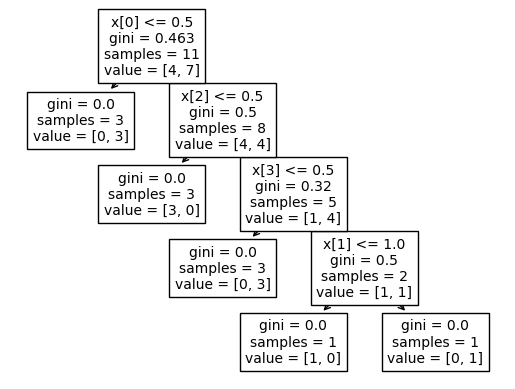

In [21]:
tree.plot_tree(DC)
plt.savefig('tennis2.pdf')

# Model Evaluation

In [22]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.6666666666666666


In [24]:
cf=confusion_matrix(y_test,y_pred)
print(cf)

[[1 0]
 [1 1]]


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



# KFold Cross Validation

In [26]:
x=d1.iloc[:,0:4]
y=d1.iloc[:,4]

In [27]:
DC=DecisionTreeClassifier()

In [28]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
from sklearn import model_selection
kf = KFold(n_splits=5)
cv_results = model_selection.cross_val_score(DC, x, y, cv=kf)

In [29]:
print(cv_results)

[1.         0.33333333 1.         0.66666667 0.5       ]


In [30]:
print(cv_results.mean())

0.7


# PART 1.B: DECISION TREE FOR DIABETES

In [10]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
d1=pd.read_csv('C:\Program Files\Diabetes - Diabetes.csv')

In [11]:
print(d1)
d1.info()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             

In [13]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
d1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.692888,72.325800,29.151052,155.795560,32.466469,0.471876,33.240885,0.348958
std,3.369578,30.436043,12.101807,8.790943,85.021487,6.875558,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.145408,156.056122,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.056122,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
d2=d1.loc[(d1['Glucose']!=0) & (d1['BloodPressure']!=0) & 
           (d1['SkinThickness']!=0) & (d1['Insulin']!=0) & (d1['BMI']!=0)]

In [42]:
d2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.692888,72.325800,29.151052,155.795560,32.466469,0.471876,33.240885,0.348958
std,3.369578,30.436043,12.101807,8.790943,85.021487,6.875558,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.145408,156.056122,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.056122,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
d1['Glucose'].replace(0,d2['Glucose'].mean(),inplace=True)
d1['BloodPressure'].replace(0,d2['BloodPressure'].mean(),inplace=True)
d1['SkinThickness'].replace(0,d2['SkinThickness'].mean(),inplace=True)
d1['Insulin'].replace(0,d2['Insulin'].mean(),inplace=True)
d1['BMI'].replace(0,d2['BMI'].mean(),inplace=True)

In [45]:
d1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.692888,72.325800,29.151052,155.795560,32.466469,0.471876,33.240885,0.348958
std,3.369578,30.436043,12.101807,8.790943,85.021487,6.875558,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.145408,156.056122,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.056122,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Spliting Dataset

In [20]:
x=d1.iloc[:,0:8]
y=d1.iloc[:,8]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


# Creating Classification Model

In [23]:

DC=DecisionTreeClassifier()

DC=DC.fit(x_train,y_train)
y_pred=DC.predict(x_test)

In [24]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0
 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 0]


In [25]:
d2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
d2.head()

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0


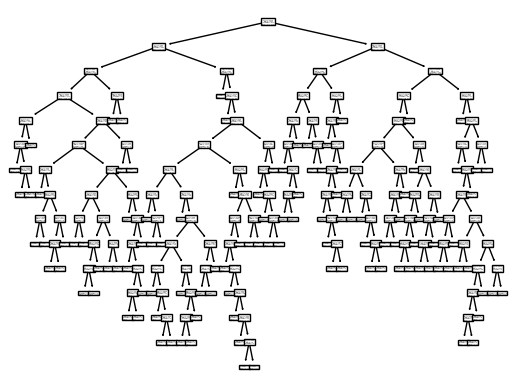

In [26]:
tree.plot_tree(DC)
plt.savefig('o1.pdf')

# Model Evaluation Metrics

In [27]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.7077922077922078


In [29]:
cf=confusion_matrix(y_test,y_pred)
print(cf)

[[74 25]
 [20 35]]


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        99
           1       0.58      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



# k-Fold Cross Validation

In [31]:
x=d1.iloc[:,0:8]
y=d1.iloc[:,8]

In [32]:
DC=DecisionTreeClassifier()

In [33]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
from sklearn import model_selection
kf = KFold(n_splits=5)
cv_results = model_selection.cross_val_score(DC, x, y, cv=kf)

In [34]:
print(cv_results)

[0.64285714 0.61688312 0.74675325 0.75816993 0.70588235]


In [35]:
print(cv_results.mean())

0.6941091588150412


# PART 2.A:RANDOM FOREST FOR DIABETES


In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
d1=pd.read_csv('C:\Program Files\Diabetes - Diabetes.csv')
print(d1)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
d1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
d2=d1.loc[(d1['Glucose']!=0) & (d1['BloodPressure']!=0) & 
           (d1['SkinThickness']!=0) & (d1['Insulin']!=0) & (d1['BMI']!=0)]

In [7]:
d2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
d1['Glucose'].replace(0,d2['Glucose'].mean(),inplace=True)
d1['BloodPressure'].replace(0,d2['BloodPressure'].mean(),inplace=True)
d1['SkinThickness'].replace(0,d2['SkinThickness'].mean(),inplace=True)
d1['Insulin'].replace(0,d2['Insulin'].mean(),inplace=True)
d1['BMI'].replace(0,d2['BMI'].mean(),inplace=True)

In [9]:
d1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.692888,72.325800,29.151052,155.795560,32.466469,0.471876,33.240885,0.348958
std,3.369578,30.436043,12.101807,8.790943,85.021487,6.875558,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.145408,156.056122,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.056122,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# SPLITING DATASET

In [10]:
x=d1.iloc[:,0:8]
y=d1.iloc[:,8]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


# CREATING CLASSIFICATION MODEL

In [13]:
rfclassifier=RandomForestClassifier()

rfclassifier=rfclassifier.fit(x_train,y_train)
y_pred=rfclassifier.predict(x_test)

In [14]:
print("Actual Values:")
print(y_test)
print("Predicted values:")
print(y_pred)

Actual Values:
285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: int64
Predicted values:
[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 1 0]


In [15]:
d2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
d2.head()

,Actual,Predicted
285,0,1
101,0,0
581,0,0
352,0,0
726,0,0


# MODEL EVALUATION

In [16]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.7792207792207793


In [17]:
cf=confusion_matrix(y_test,y_pred)

In [18]:
print(cf)

[[88 11]
 [23 32]]


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



# K-FOLD CROSS VALIDATION

In [20]:
x=d1.iloc[:,0:8]
y=d1.iloc[:,8]

In [21]:
rfclassifier=RandomForestClassifier()

In [22]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
from sklearn import model_selection
kf = KFold(n_splits=5)
cv_results = model_selection.cross_val_score(rfclassifier, x, y, cv=kf)

In [23]:
print(cv_results)

[0.74675325 0.68831169 0.77922078 0.83660131 0.7254902 ]


In [24]:
print(cv_results.mean())


0.7552754435107377


# PART 2.B:RANDOM FOREST FOR TENNIS


In [25]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
d1=pd.read_csv('tennis.csv')
print(d1)


     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no


In [27]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d1.iloc[:,0] = le.fit_transform(d1.iloc[:,0]) # outlook column - index no. 0- will encode outlook column
d1.iloc[:,1] = le.fit_transform(d1.iloc[:,1]) # temp
d1.iloc[:,2] = le.fit_transform(d1.iloc[:,2]) # humidity
d1.iloc[:,3] = le.fit_transform(d1.iloc[:,3]) # windy
d1.iloc[:,4] = le.fit_transform(d1.iloc[:,4]) # play
print(d1)
d1.info()

    outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int32
 1   temp      14 non-null     int32
 2   humidity  14 non-null     int32
 3   windy     14 non-null     int64
 4   play      14 non-null     int32
dtypes: int32(4), int64(

C:\Users\HP\AppData\Local\Temp\ipykernel_16832\1076206382.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  d1.iloc[:,0] = le.fit_transform(d1.iloc[:,0]) # outlook column - index no. 0- will encode outlook column
C:\Users\HP\AppData\Local\Temp\ipykernel_16832\1076206382.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  d1.iloc[:,1] = le.fit_transform(d1.iloc[:,1]) # temp
C:\Users\HP\AppData\Local\Temp\ipykernel_16832\1076206382.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplac

In [29]:
x=d1.iloc[:,0:4]
y=d1.iloc[:,4]
print(x.shape)
print(y.shape)

(14, 4)
(14,)


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11, 4)
(11,)
(3, 4)
(3,)


In [32]:
rfclassifier=RandomForestClassifier()

rfclassifier=rfclassifier.fit(x_train,y_train)
y_pred=rfclassifier.predict(x_test)

In [33]:
print("Actual Values:")
print(y_test)
print("Predicted values:")
print(y_pred)

Actual Values:
3    1
7    0
6    1
Name: play, dtype: int32
Predicted values:
[1 0 1]


# MODEL EVALUATION

In [34]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 1.0


In [35]:
cf=confusion_matrix(y_test,y_pred)

In [36]:
print(cf)

[[1 0]
 [0 2]]


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

